<a href="https://colab.research.google.com/github/jennychen0223/Automated_Optical_Inspection-AOI/blob/main/Aidea_AOI_ResNet50_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers, regularizers, metrics, regularizers, models, layers, utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import ntpath
from PIL import Image 
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! cp "/content/drive/My Drive/aoi/train.csv" /content/
! cp "/content/drive/My Drive/aoi/test.csv" /content/

In [ ]:
! unzip /content/drive/MyDrive/train_images.zip > data_unzip.log

replace train_images/train/4/train_02323.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train_path = '/content/train_images/train/'
valid_path = '/content/train_images/valid/'
test_path = '/content/train_images/test/'


In [ ]:
train_0 = glob("/content/train_images/train/0/*.png") #查詢路徑方法
train_1 = glob("/content/train_images/train/1/*.png") 
train_2 = glob("/content/train_images/train/2/*.png") 
train_3 = glob("/content/train_images/train/3/*.png") 
train_4 = glob("/content/train_images/train/4/*.png")
train_5 = glob("/content/train_images/train/5/*.png") 


test_0 = glob("/content/train_images/test/0/*.png") 
test_1 = glob("/content/train_images/test/1/*.png")
test_2 = glob("/content/train_images/test/2/*.png") 
test_3 = glob("/content/train_images/test/3/*.png")
test_4 = glob("/content/train_images/test/4/*.png") 
test_5 = glob("/content/train_images/test/5/*.png") 

valid_0 = glob("/content/train_images/valid/0/*.png") 
valid_1 = glob("/content/train_images/valid/1/*.png")
valid_2 = glob("/content/train_images/valid/2/*.png")
valid_3 = glob("/content/train_images/valid/3/*.png")
valid_4 = glob("/content/train_images/valid/4/*.png") 
valid_5 = glob("/content/train_images/valid/5/*.png") 

print("train_0 : ", len(train_0))
print("train_1 : ", len(train_1))
print("train_2 : ", len(train_2))
print("train_3 : ", len(train_3))
print("train_4 : ", len(train_4))
print("train_5 : ", len(train_5))
print()

print("test_0 : ", len(test_0))
print("test_1 : ", len(test_1))
print("test_2 : ", len(test_2))
print("test_3 : ", len(test_3))
print("test_4 : ", len(test_4))
print("test_5 : ", len(test_5))
print()

print("valid_0 : ", len(valid_0))
print("valid_1 : ", len(valid_1))
print("valid_2 : ", len(valid_2))
print("valid_3 : ", len(valid_3))
print("valid_4 : ", len(valid_4))
print("valid_5 : ", len(valid_5))

train_0 :  492
train_1 :  338
train_2 :  73
train_3 :  254
train_4 :  168
train_5 :  444

test_0 :  86
test_1 :  84
test_2 :  10
test_3 :  68
test_4 :  40
test_5 :  92

valid_0 :  96
valid_1 :  70
valid_2 :  17
valid_3 :  56
valid_4 :  32
valid_5 :  108


In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from keras.applications.inception_v3 import InceptionV3
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers, regularizers, metrics, regularizers, models, layers, utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
import tensorflow as tf
import ntpath
from keras.applications.resnet50 import ResNet50
from PIL import Image 
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
import os
from time import gmtime, strftime
import matplotlib.pyplot as plt


In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255, #影象張量的數字縮放
      rotation_range=40, # 角度值，0~180，影象旋轉
      width_shift_range=0.2, # 水平平移，相對總寬度的比例
      height_shift_range=0.2, # 垂直平移，相對總高度的比例
      shear_range=0.2, # 隨機錯切換角度
      zoom_range=0.2, # 隨機縮放範圍
      horizontal_flip=True, # 一半影象水平翻轉
      fill_mode='nearest') # 填充新建立畫素的方法

In [ ]:
train_generator = train_datagen.flow_from_directory(
      train_path, # 目標目錄
      target_size=(224, 224), # 所有影象調整為150x150
      classes=['0', '1', '2', '3', '4', '5'],
      batch_size=32,
      class_mode='categorical')

Found 1769 images belonging to 6 classes.


In [ ]:
train_generator.image_shape

(224, 224, 3)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        classes=['0', '1', '2', '3', '4', '5'],
        batch_size=32,
        class_mode='categorical')

Found 379 images belonging to 6 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf

conv_base = ResNet50(weights='imagenet', 
                  include_top=True,
                  input_shape=(224,224,3))
model = models.Sequential()
model.add(conv_base)

# model.add(Conv2D(32, (1, 1),activation="relu"))
# model.add(Dropout(0.2))
# model.add(Conv2D(64,(3, 3),activation="relu"))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(32))
# model.add(Dense(64))
# model.add(Dense(64))

model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.01),
              metrics=['acc'])



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# model.summary()

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=10
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
50/50 [==============================] - 58s 612ms/step - loss: 1.7728 - acc: 0.4500 - val_loss: 1.7883 - val_acc: 0.2906
Epoch 2/40
50/50 [==============================] - 28s 561ms/step - loss: 1.7357 - acc: 0.7050 - val_loss: 1.7938 - val_acc: 0.1281
Epoch 3/40
50/50 [==============================] - 30s 587ms/step - loss: 1.7265 - acc: 0.7369 - val_loss: 1.7859 - val_acc: 0.2469
Epoch 4/40
50/50 [==============================] - 28s 563ms/step - loss: 1.7193 - acc: 0.7994 - val_loss: 1.7797 - val_acc: 0.3500
Epoch 5/40
50/50 [==============================] - 29s 574ms/step - loss: 1.7163 - acc: 0.8111 - val_loss: 1.7882 - val_acc: 0.2688
Epoch 6/40
50/50 [==============================] - 29s 566ms/step - loss: 1.7093 - acc: 0.8541 - val_loss: 1.7909 - val_acc: 0.1562
Epoch 7/40
50/50 [==============================] - 29s 583ms/step - loss: 1.7066 - acc: 0.8785 - val_loss: 1.7896 - val_acc: 0.1688
Epoch 8/40
50/50 [==============================] - 28s 565ms/step - 

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        classes=['0', '1', '2', '3', '4', '5'],
        batch_size=32,
        class_mode='categorical')

Found 380 images belonging to 6 classes.


In [ ]:
test_loss, test_acc = model.evaluate_generator(
	test_generator, 
	steps=test_generator.samples//test_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('test acc:', test_acc)


test acc: 0.9545454382896423


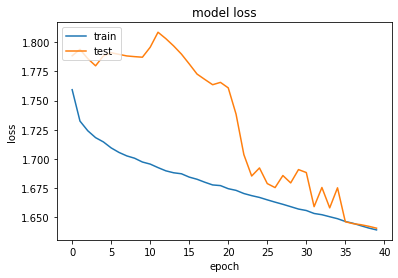

In [ ]:
# plot model loss & save
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

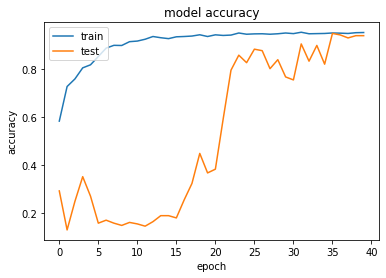

In [ ]:
# plot model accuracy & save
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
test_loss, test_acc = model.evaluate_generator(
	test_generator, 
	steps=test_generator.samples//test_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('test acc:', test_acc)


test acc: 0.9545454382896423


In [ ]:
! unzip /content/drive/MyDrive/aoi/test_images.zip > data_unzip.log

replace test_images/test_00000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
test_path2 = 'test_images/'


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator2 = test_datagen.flow_from_directory(
        '.',
        target_size=(224, 224),
        class_mode='categorical',
        classes=['test_images'],
	      batch_size=1,
	      shuffle=False)

In [ ]:
steps2=test_generator2.samples//test_generator2.batch_size
print(steps2)

In [ ]:
predict = model.predict_generator(
    test_generator2,
    steps=test_generator2.samples//test_generator2.batch_size)


In [ ]:
import csv
i =0 
#f1 = open ("inFile","r") # open input file for reading
with open('output.csv', 'w') as csvfile:
	writer = csv.writer(csvfile)
	writer.writerow(['ID', 'Label'])
	#print(len(predict))
	while i < len(predict):
		#image, label = test_generator2._get_batches_of_transformed_samples(np.array([i]))
		image_name = test_generator2.filenames[i]
		result=np.where(predict[i] == np.amax(predict[i]))[0][0]
		writer.writerow([image_name, result])
		i=i+1
	print(i)

In [ ]:
result = pd.read_csv('output.csv')
result["ID"] = result["ID"].str.replace("test_images/t","t")


In [ ]:
import pandas as pd
result.to_csv('Result_ResNet50.csv', index=False )